In [1]:
from __future__ import print_function, division
import numpy as np
from utils import euclidean_distance

class KNN():
    """ K Nearest Neighbors classifier.

    Parameters:
    -----------
    k: int
        The number of closest neighbors that will determine the class of the 
        sample that we wish to predict.
    """
    def __init__(self, k=5):
        self.k = k

    def _vote(self, neighbor_labels):
        """ Return the most common class among the neighbor samples """
        counts = np.bincount(neighbor_labels.astype('int'))
        return counts.argmax()

    def predict(self, X_test, X_train, y_train):
        y_pred = np.empty(X_test.shape[0])
        # Determine the class of each sample
        for i, test_sample in enumerate(X_test):
            # Sort the training samples by their distance to the test sample and get the K nearest
            idx = np.argsort([euclidean_distance(test_sample, x) for x in X_train])[:self.k]
            # Extract the labels of the K nearest neighboring training samples
            k_nearest_neighbors = np.array([y_train[i] for i in idx])
            # Label sample as the most common class label
            y_pred[i] = self._vote(k_nearest_neighbors)

        return y_pred
        

Accuracy: 0.9183673469387755


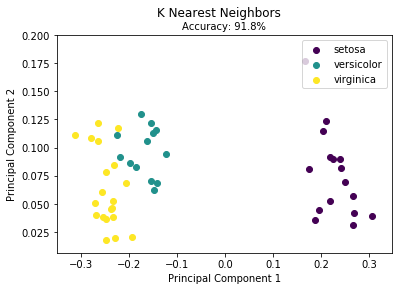

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from utils import train_test_split, normalize, accuracy_score
from utils import euclidean_distance, Plot

def main():
    data = datasets.load_iris()
    X = normalize(data.data)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    clf = KNN(k=5)
    y_pred = clf.predict(X_test, X_train, y_train)
    
    accuracy = accuracy_score(y_test, y_pred)

    print ("Accuracy:", accuracy)

    # Reduce dimensions to 2d using pca and plot the results
    Plot().plot_in_2d(X_test, y_pred, title="K Nearest Neighbors", accuracy=accuracy, legend_labels=data.target_names)


main()